# 3.3	Scipy包

# 3.3.2 基本操作

1.数据输入输出
scipy.io如何对mat格式文件进行操作

In [1]:
#导入scipy.io模块
from scipy.io import loadmat,savemat,whosmat
import numpy as np
#创建numpy数组
arr1=np.arange(10)
#输出创建的numpy数组
print(arr1)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
#字典形式保存为mat格式的文件
savemat('scipy_io.mat',{'arr1':arr1})   #保存为scipy_io.mat文件，单引号中是保存文件的名字，可以看到创建的文件。
#输出存储在mat文件中的变量
print(whosmat('scipy_io.mat'))

[('arr1', (1, 10), 'int32')]


In [3]:
#加载已存储的mat文件
io_mat=loadmat('scipy_io.mat')
#创建变量获得加载获取的mat变量
sar=io_mat['arr1']
print(sar)

[[0 1 2 3 4 5 6 7 8 9]]


2.统计

如下代码显示了scipy.stats如何实现正态分布

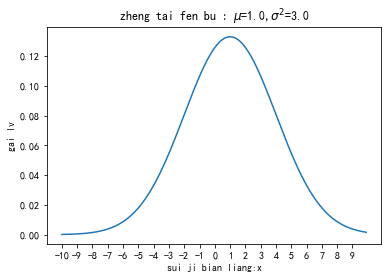

In [5]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif']=['KaiTi'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#定义随机变量
#平均值
mea=1 
#标准差
stand=3 
X=np.arange(-10,10,0.1)
#概率密度函数（PDF）,连续分布用pdf,离散分布用pmf
y=stats.norm.pdf(X,mea,stand)
#调用stats.norm.pdf方法，画出均值为u，标准差为stand的概率密度分布图。
#绘图
plt.plot(X,y)
#设置x轴显示区域和间隔
plt.xticks(np.arange(-10,10,1))
#x轴标题
plt.xlabel('sui ji bian liang:x')
#y轴标题
plt.ylabel('gai lv')
#图标题
plt.title('zheng tai fen bu : $\mu$=%.1f,$\sigma^2$=%.1f'%(mea,stand))
#显示图形
plt.show()

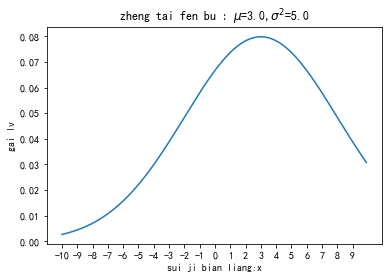

In [6]:
###### 改不同方差  stand=1,2,3,5,8.....
mea=3
#标准差
stand=5
X=np.arange(-10,10,0.1)
#概率密度函数（PDF）,连续分布用pdf,离散分布用pmf
y=stats.norm.pdf(X,mea,stand)
#绘图
plt.plot(X,y)
#设置x轴显示区域和间隔
plt.xticks(np.arange(-10,10,1))
#x轴标题
plt.xlabel('sui ji bian liang:x')
#y轴标题
plt.ylabel('gai lv')
#图标题
plt.title('zheng tai fen bu : $\mu$=%.1f,$\sigma^2$=%.1f'%(mea,stand))
#显示图形
plt.show()

如下代码显示了scipy.stats如何实现均匀分布

In [ ]:
# from scipy.stats import uniform
# from matplotlib import pyplot as plt
# import numpy as np
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# loc = 2
# scale = 2
#  #平均值, 方差, 偏度, 峰度
# mean,var,skew,kurt =uniform.stats(loc,scale,moments='mvsk')
# #ppf:累积分布函数的反函数。q=0.01时，ppf就是p(X<x)=0.01时的x值。
# x = np.linspace(uniform.ppf(0.01,loc,scale),uniform.ppf(0.99,loc,scale),100)
# fig,ax = plt.subplots(1,1)
# ax.plot(x, uniform.pdf(x,loc,scale),'b-',label = 'uniform')
# #x轴标题
# plt.xlabel('随机变量：x')
# #y轴标题
# plt.ylabel('概率')
# plt.title(u'均匀分布概率密度函数')
# plt.show()


# 3.3.3图像处理

Scipy具有图像处理子包对于图像进行简单处理，如下代码以下图所示为例展示了常见的高斯滤波、边缘锐化处理、中值滤波等应用及其结果。

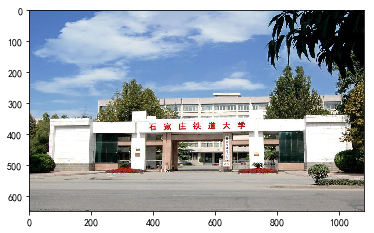

In [7]:
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt

lin=plt.imread('door.jfif')
#face = misc.face()#face是测试图像之一
plt.figure()#创建图形
plt.imshow(lin)#绘制测试图像
plt.show()#原始图像

对原始图像进行滤波，产生各种效果。

###    1.高斯滤波

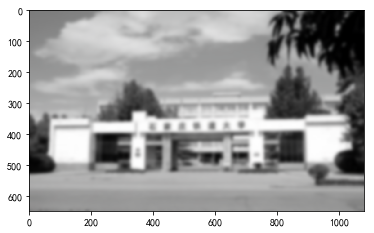

In [12]:
#高斯滤波
#sigma取不同的值 1,2,3...8
from scipy.ndimage import filters
blurred_lin = ndimage.gaussian_filter(lin, sigma=5)   ##sigma取不同值，5,4，3，2,1，观看效果
plt.imshow(blurred_lin)
plt.show()

###   2.边缘锐化

图像边缘锐化，利用高斯滤波实现。先通过高斯滤波进行模糊化处理，再通过作差位数放大实现。

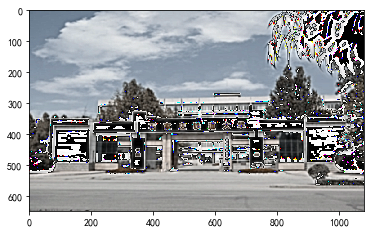

In [15]:
#边缘锐化
blurred_lin2 = ndimage.gaussian_filter(lin, sigma=2)
blurred_lin4 = ndimage.gaussian_filter(lin, sigma=5)
sharp_lin = blurred_lin2 +2*(blurred_lin2-blurred_lin4)
plt.imshow(sharp_lin)
plt.show()

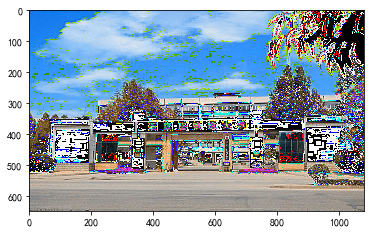

In [17]:
#不同参数值 影响
blurred_lin2 = ndimage.gaussian_filter(lin, sigma=1)
blurred_lin4 = ndimage.gaussian_filter(lin, sigma=2)
sharp_lin = blurred_lin2 +3*(blurred_lin2-blurred_lin4)
plt.imshow(sharp_lin)
plt.show()

###   3.图像旋转

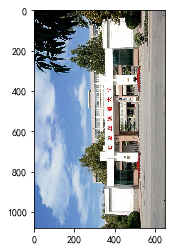

In [18]:
#对于原始图像旋转指定角度
#修改旋转角度大小
rotate_lin = ndimage.rotate(lin, 90)  #取不同的值20,30，45，90，180
plt.imshow(rotate_lin)
plt.show()

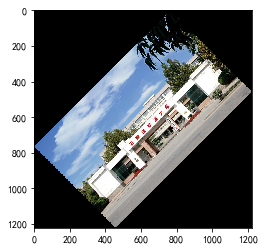

In [20]:
#修改旋转角度大小
rotate_lin = ndimage.rotate(lin, 45)  #取不同的值20,30，45，90，180
plt.imshow(rotate_lin)
plt.show()

# 3.3.4	快速傅立叶变换

产生一个含有多个频率的正弦波。

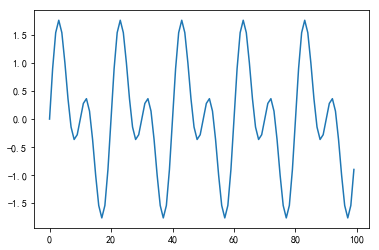

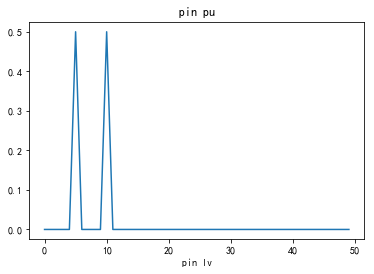

In [21]:
from scipy import fftpack
import matplotlib.pyplot as plt
import numpy as np

time_step = 1
period =10
time_vec = np.arange(0,100,time_step)
x = np.sin(2 * np.pi / period * time_vec) + np.sin(2 * np.pi / (2 * period) * time_vec)
sample_freq = fftpack.fftfreq(x.size, d = time_step)
x_fft = fftpack.fft(x)

plt.plot(x)
plt.show()
N = x.shape[0]
abs_x = np.abs(x_fft)
normalization_x = abs_x / N
normalization_half_x = normalization_x[range(int(N / 2))]
plt.plot(normalization_half_x)
plt.title('pin pu')
plt.xlabel('pin lv')

plt.show()

scipy.fftpack.fftfreq()函数生成采样频率，scipy.fftpack.fft()计算快速傅里叶变换。以下代码通过实例进行说明

In [ ]:
from scipy import fftpack
import numpy as np
time_step = 0.1
period =10
time_vec = np.arange(0,1,time_step)
x = np.sin(2 * np.pi / period * time_vec) + 0.5 *np.random.randn(time_vec.size)
print ('x的大小：',x.size)
print ('x：',x)
sample_freq = fftpack.fftfreq(x.size, d = time_step)
x_fft = fftpack.fft(x)
print ('x经过FFT的大小：',x_fft.size)
print ('x经过FFT值：',x_fft)

# 3.3.5	函数插值 （不讲）

插值是根据已有的数据分布获得对应函数拟合得到数据点的走势，依据走势对于缺失的数据点进行计算插值。
scipy.interpolate子包里通过类对已知数据点计算找到一个合适的函数进行插值。通过插值得到的数据与原始数据分布近似，可以解决数据缺失和数据分布间隔大等问题。

如下代码以一维数据为例，讲解了插值的基本用法，展示了不同插值方法用法、结果和对应的图像分布结果。原始数据、线性插值和三次多项式插值如图所示

In [ ]:
#导入对应的scipy子包
#from scipy import interpolate as interp1d
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
#随机生成变量x
x = np.arange(10)
#获得对应y轴数据
y = np.cos(2*x+4)*np.exp(x/5)
print (x,y)
plt.plot(x,y,'o')


#线性插值数据函数
f1 = interp1d(x, y,kind = 'linear')
#三次多项式插值数据函数
f2 = interp1d(x, y, kind = 'cubic')


#生成插值数据，序列的取值空间是（0，9），生成的样本数20
xn = np.linspace(0,9,20)
#绘制插值图像
plt.plot(x, y, 'o', xn, f1(xn), 'g-', xn, f2(xn), 'b*')
#设置图注
plt.legend(['originaldata', 'linear', 'cubic'], loc = 'best')
#显示图片
plt.show()


原始数据、线性插值和三次多项式插值与平滑曲线对比如图所示

In [ ]:
from scipy import interpolate
#平滑曲线
spl = interpolate.UnivariateSpline(x, y)
xs = np.linspace(0,9, 1000)
#手动更改平滑量
spl.set_smoothing_factor(0.5)
plt.plot(x, y, 'o', xn, f1(xn), 'g-', xn, f2(xn), 'b*',xs, spl(xs),'r')
plt.legend(['originaldata', 'linear', 'cubic','smooth'])
plt.show()


# 3.3.6	优化

1.曲线拟合

curve_fit曲线拟合是scipy拥有的另一功能，主要是利用使用函数的形式通过已知数据刻画数据的趋势，通过拟合算法获得对应函数的最佳参数。主要用于数据分布较为明显的问题，通过分析已知数据分布，得知数据分布规律，确定数据分布函数。如下代码通过实例讲述了基于scipy通过正弦拟合用法，得到结果如图所示

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
#生成采样点
x1 = np.linspace(-10,10, 100)

# 函数模型用于生成数据
def f(x, a, b):
   return a*np.sin(x) + b

# 产生含噪声的样本数据
y1= f(x1,20,2) + 2*np.random.randn(x1.size) # 加入随机数作为噪声

# 使用curve_fit()函数来估计a和b的值
fitparmas, firerrors = optimize.curve_fit(f, x1, y1)

# 输出结果
print('\n求出拟合参数a, b: ')
print(fitparmas)

print('\n拟合误差: ')
print(firerrors)
#计算拟合结果
y2= f(x1, fitparmas[0], fitparmas[1])

plt.plot(x1, y1, 'o', color="g", label = "original")
plt.plot(x1, y2, color="y", label = "fit")
plt.legend(loc = "best")

#plt.savefig('./opt10-1.png') # 保存要显示的图片
plt.show()



2.最小二乘法（不讲）

least square的缩写是leastsq，leastsq()函数是scipy.optimize模块提供的实现最小二乘拟合算法的函数。最小二乘法通过最小化误差的平方和获得最优曲线，它是数值优化的经典算法。如下代码通过实例讲述了基于scipy进行最小二乘法用法，其结果如图所示

In [ ]:
#导入所需要的包
from scipy import optimize    
import numpy as np
import matplotlib.pyplot as plt
# 样本数据
X = np.array([16.5,15.7,14.3,18.1,16.9,16.7,19.1,15.5,16.6])
Y = np.array([7.9,8.2,8.1,6.8,7.8,6.3,6.6,8.8,9.2])

# 偏差函数, 计算以p为参数的直线和原始数据之间的误差
def error(p):
        k, b = p
        return Y-(k*X+b)

# leastsq()error()的输出数组的平方和最小，参数的初始值为[10,1]
param = optimize.leastsq(error,[10,1])
k,b =param[0]
print("k = ", k, "b = ", b)

#画样本点,指定图像比例：5:4
plt.figure(figsize=(5,4),dpi=600) 
plt.scatter(X, Y, color="g", label="original")

#画拟合直线,在14-20直接画10个连续点
x = np.linspace(14,20,10)
#函数公式
y = k*x + b 
plt.plot(x,y,color="r", label="fit")
#绘制图例
plt.legend() 
plt.savefig('./opt11-1.png') # 保存要显示的图片
plt.show()

